In [2]:
import numpy as np
from matplotlib import pyplot as plt

### Problem 1

7.024700607183531


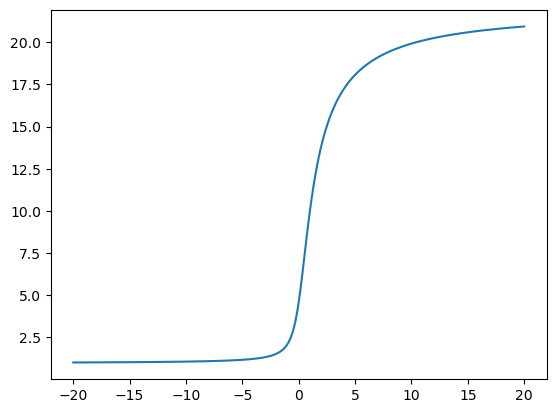

In [36]:
def fun(x,y):
    return y/(1+x**2)

def rk4_step(fun,x,y,h):
    k1=fun(x,y)*h
    k2=h*fun(x+h/2,y+k1/2)
    k3=h*fun(x+h/2,y+k2/2)
    k4=h*fun(x+h,y+k3)
    dy=(k1+2*k2+2*k3+k4)/6
    return y+dy

def rk4_step(fun,x,y,h):
    k1=fun(x,y)*h
    k2=h*fun(x+h/2,y+k1/2)
    k3=h*fun(x+h/2,y+k2/2)
    k4=h*fun(x+h,y+k3)
    dy=(k1+2*k2+2*k3+k4)/6
    return y+dy

y0=1
x=np.linspace(-20,20,200)
h=np.median(np.diff(x))
y=np.zeros(len(x))
y[0]=y0
for i in range(len(x)-1):
    y[i+1]=rk4(fun,x[i],y[i],h)
plt.plot(x,y)
truth=np.exp(np.arctan(x))
print(np.std(truth-y))
plt.show()

rk4 method has error to $h^5$. Then error in single step is $(2h)^5$ and two steps is $2(h)^5$. Then the error is the difference in the estimation of the single step and two steps, which is $(2h)^5 - 2(h)^5 = 30h^5$. So we should divide the error by 30 and add to our estimate to improve. New stepper uses 3 more function evaluations per step.

7.024746689707303


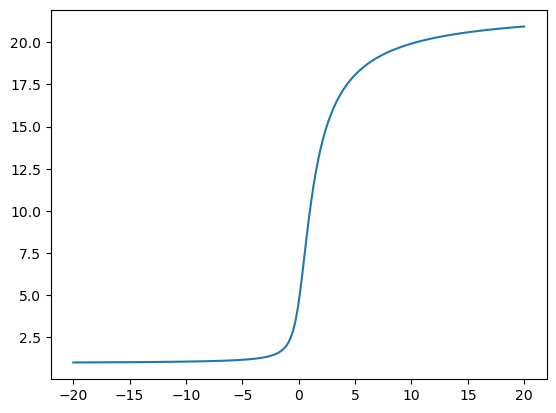

In [43]:
def rk4_stepd(fun,x,y,h):
    k1=fun(x,y)*h
    k2=h*fun(x+h/2,y+k1/2)
    k3=h*fun(x+h/2,y+k2/2)
    k4=h*fun(x+h,y+k3)
    dy=(k1+2*k2+2*k3+k4)/6
    
    a2=h*fun(x+h/4,y+k1/2)
    a3=h*fun(x+h/4,y+a2/2)
    a4=h*fun(x+h,y+a3)
    dy_new=(k1+2*a2+2*a3+a4)/6
    
    error=(dy-dy_new)/15
    return y+dy+error

y0=1
x1=np.linspace(-20,20,200)
h1=np.median(np.diff(x1))
y1=np.zeros(len(x1))
y1[0]=y0
for i in range(len(x1)-1):
    y1[i+1]=rk4_stepd(fun,x1[i],y1[i],h1)
plt.plot(x1,y1)
truth=np.exp(np.arctan(x1))
print(np.std(truth-y1))
plt.show()